LINK TO DATASET USED - <br>
STANFORD NETWORK ANALYSIS PROJECT (2013). Amazon Fine Food Reviews. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/data 

***An explanation of why the data set is appropriate for logistic regression***

This dataset that we have, on Amazon food reviews sentiment analysis is appropriate for logistic regression for several reasons:

* Binary Classification: Logistic regression is a binary classification algorithm, meaning it's suitable when you want to predict one of two classes. In our dataset, we've transformed the 'Score' into two classes: 0 for sentiments 1-3 and 1 for sentiments 4-5. This binary classification problem aligns perfectly with the logistic regression model, as it's designed for such tasks.
* Categorical Dependent Variable: Logistic regression works well when the dependent variable (in our case, the 'Score') is categorical. Since we've already categorized the sentiment into two classes, logistic regression can effectively model this categorical outcome.
* Linear Relationship: Logistic regression assumes a linear relationship between the features (independent variables) and the log-odds of the outcome. In our dataset, the relationship between the features (text-based features derived from reviews) and the likelihood of a positive (1) or negative (0) sentiment can be assumed to be approximately linear. This is reasonable for text classification tasks where certain words or combinations of words may influence sentiment.
* Feature Importance: Logistic regression provides coefficients for each feature (words or phrases in the reviews) that indicate their importance in predicting the outcome. This can help us identify which words or features are strong indicators of positive or negative sentiments in the food reviews.
* Interpretability: Logistic regression models are interpretable. You can easily interpret the coefficients to understand how each feature influences the predicted sentiment. This interpretability can be valuable for understanding the factors that contribute to positive or negative sentiment in food reviews.
* Efficiency: Logistic regression is computationally efficient and can handle datasets of various sizes. For text-based datasets, this efficiency is an advantage when dealing with a large number of reviews.
* Assumptions: The assumptions of logistic regression are not severely violated in the context of our dataset. For example, it doesn't assume a normal distribution of errors or equal variance across groups, which can be limiting in some datasets.

In summary, our dataset's transformation into a binary sentiment classification task and the nature of the relationship between features and sentiment make it a suitable candidate for logistic regression. This algorithm is well-suited for predicting whether a food review has a positive or negative sentiment based on the 'Score' and 'Text' features in your dataset.

***An explanation of what analysis is going to be performed on the dataset. What is the question that the analysis will answer? <br>***

The analysis we conducted on the Amazon food reviews sentiment dataset is outlined as follows:
Exploratory Analysis and Data Wrangling:<br>

* We initiated our analysis with comprehensive data exploration, including the generation of summary statistics and visual representations of the distribution of data.<br>
* To enhance data quality, we addressed missing information by removing rows containing NaN values in both the 'Text' and 'Score' columns.<br>
* We performed meticulous text preprocessing to refine and prepare the 'Text' column, which encompassed eliminating HTML tags, square brackets, and URLs.<br>

Logistic Regression Model:<br>
* We developed a logistic regression model from scratch, tailored for predicting sentiment based on the food reviews.<br>
* Several model hyperparameters were fine-tuned to maximize accuracy and circumvent **overfitting.**<br>

Techniques for Boosting Accuracy:<br>
* Removal of NaN Values: By filtering out rows with missing values, we elevated the dataset's completeness and reliability.<br>
* Strategic Train-Test Split: Employing a structured division of the dataset into training and testing subsets ensured the model's aptitude for generalization to new, unseen data.<br>

* TF-IDF Vectorization: The text data underwent transformation into a numerical format using TF-IDF vectorization, which preserved word importance by considering their frequency within the dataset.<br>
* Introduction of Regularization (L2 Regularization): To mitigate **overfitting**, a layer of L2 regularization was incorporated into the logistic regression model. This was achieved by introducing an alpha parameter that penalized substantial weight values.<br>
* Customization of Learning Rate and Iterations: We fine-tuned both the learning rate and the number of iterations to optimize the gradient descent process, resulting in enhanced convergence and heightened accuracy.<br>
* Threshold Adjustment for Predictions: The threshold for predictions was meticulously configured, enabling a controlled level of sensitivity, consequently yielding more conservative predictions.<br>
* Additional Evaluation Metrics: Beyond accuracy, we harnessed a rich assortment of evaluation metrics, including precision, recall, F1-score, and support. These metrics, facilitated by the classification_report function, granted a comprehensive evaluation of model performance, particularly beneficial for datasets exhibiting class imbalance.<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [2]:
df=pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
#Summary of the dataset
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Graph showing the count of reviews in each sentiment number ( 1 - 5 )

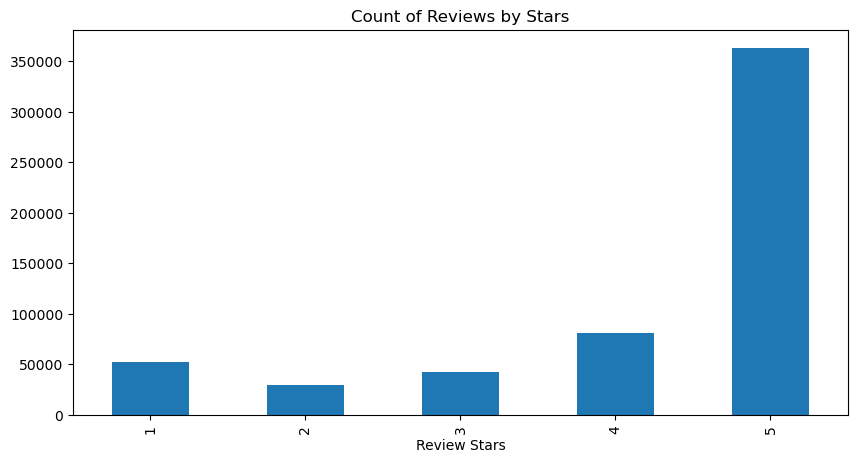

In [4]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Cleaning up the dataset 🧼

In [5]:
#Bright Data. (2023). BeautifulSoup Web Scraping - Ultimate Guide. [online] Available at: 
# https://brightdata.com/blog/how-tos/how-to-use-beautiful-soup-for-web-scraping-with-python#:~:text=What%20is%20Beautiful%20Soup%3F,have%20to%20think%20about%20encodings
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['Text']=df['Text'].apply(denoise_text)

C:\Users\moham\AppData\Local\Temp\ipykernel_16120\50233995.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [7]:
del df['Id']
del df['Time']
del df['UserId']
del df['ProductId']
del df['HelpfulnessNumerator']
del df['HelpfulnessDenominator']

In [8]:
df.head()

,ProfileName,Score,Summary,Text
0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df['Text'] = df['Text'] + ' ' + df['Summary'] + ' ' + df['ProfileName']
del df['Summary']
del df['ProfileName']
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


### Some visualizations 📊

**WordCloud of the most frequent text from all the BAD reviews**

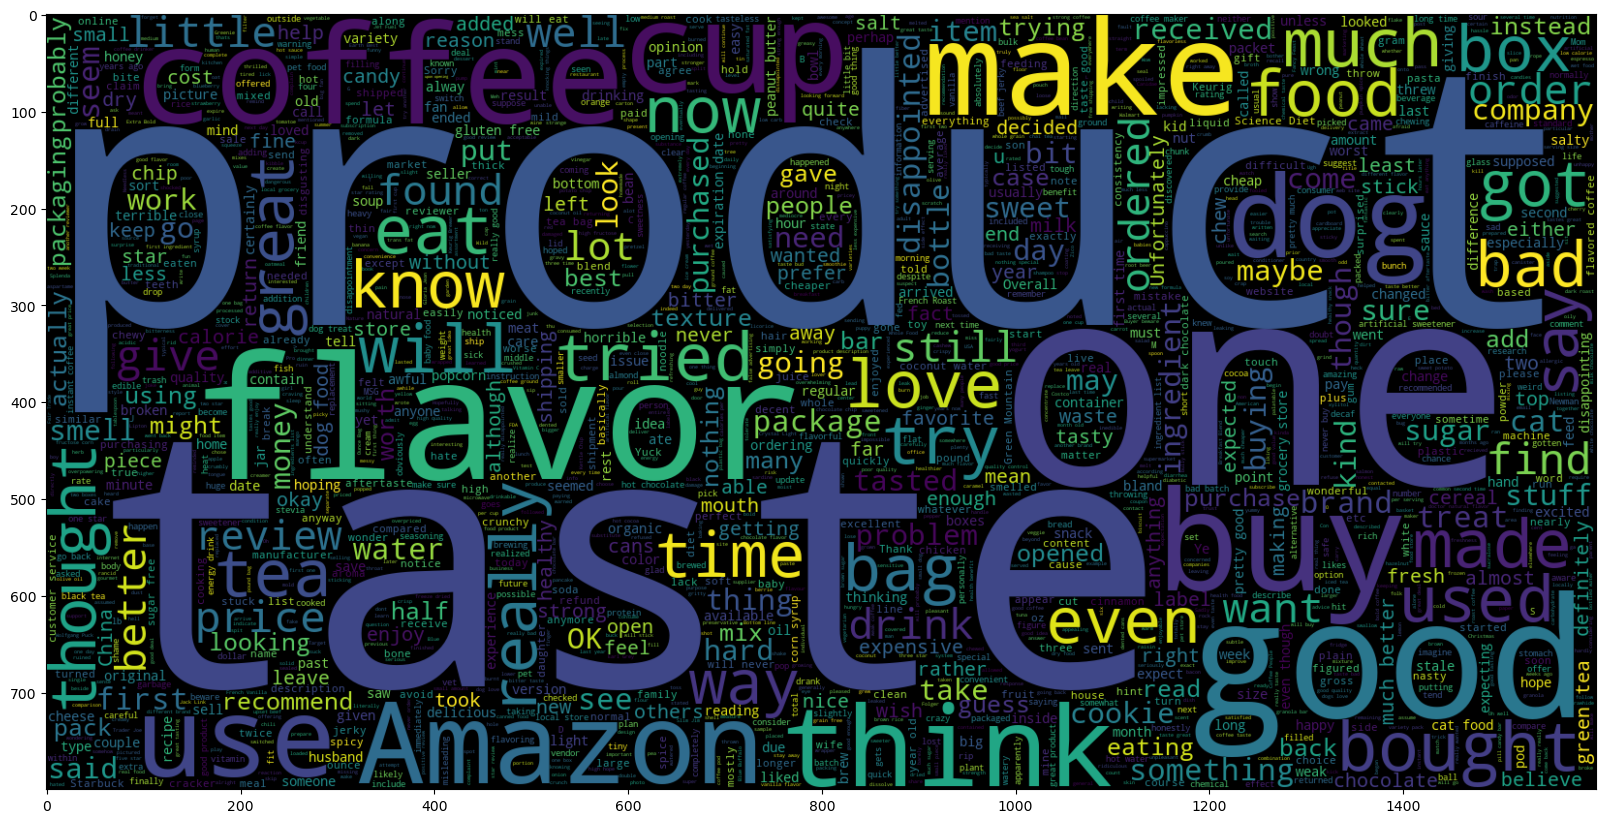

In [33]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(df[df.Score == 0].Text))
plt.imshow(wc , interpolation = 'bilinear')

**WordCloud of the most frequent text from all the GOOD reviews**

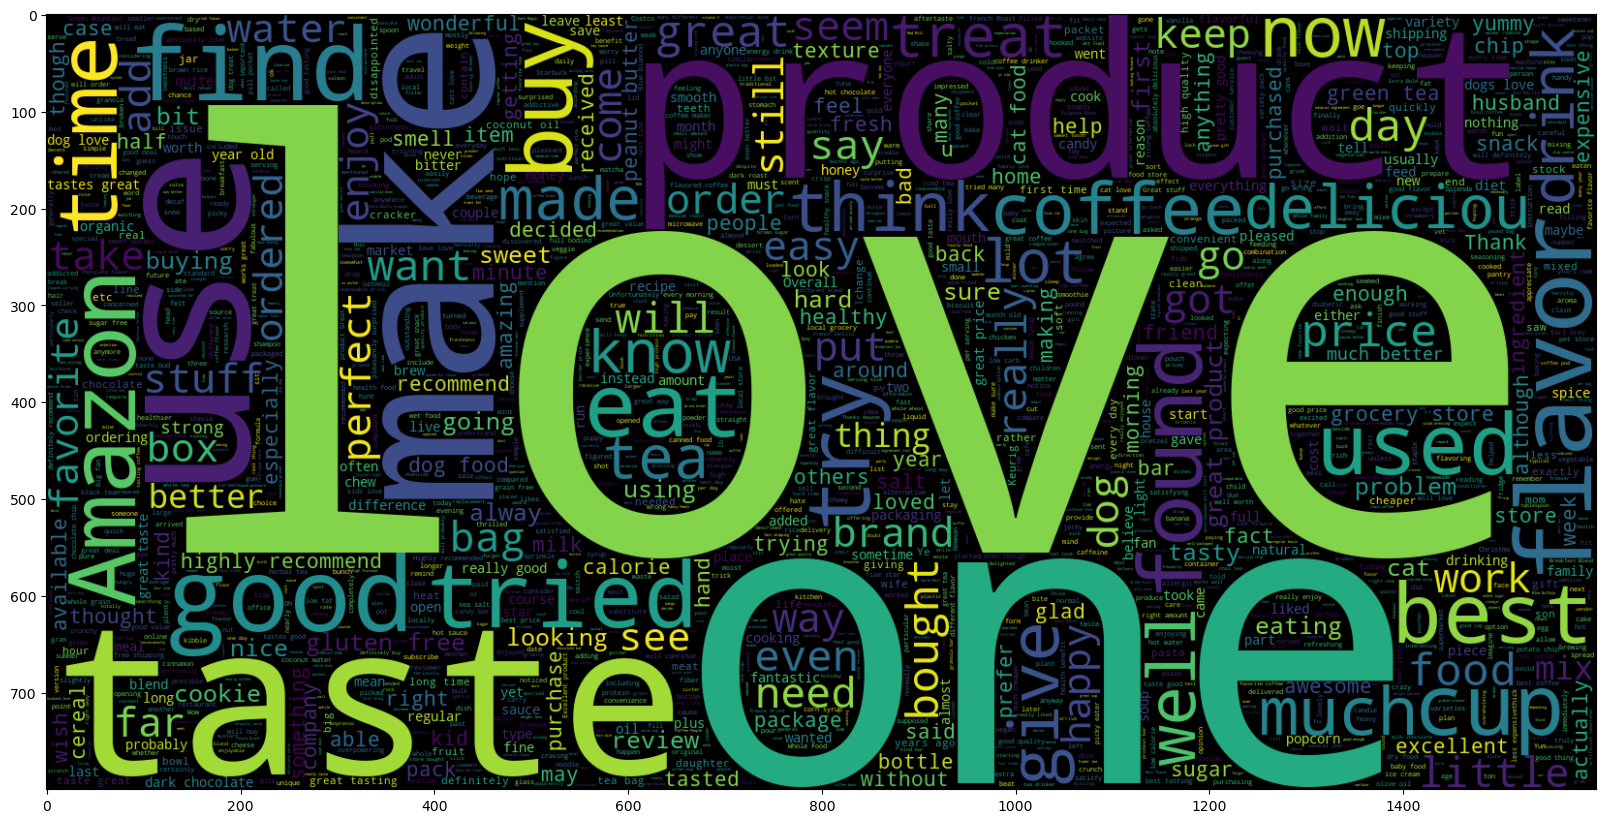

In [34]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(df[df.Score ==1].Text))
plt.imshow(wc , interpolation = 'bilinear')

### Making all the review numbers from 1 - 3 = 0, and 4 and 5 = 1 (for Logistic Regression model to determine its sentiment) 👨‍💻

In [10]:
def score_sentiment(score):
    # Replace scores of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(score == 1 or score == 2 or score == 3):
        return 0
    else:
        return 1
df.Score = df.Score.apply(score_sentiment) 

In [11]:
df.head()

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...


In [12]:
df.isna().sum()

Score     0
Text     43
dtype: int64

In [13]:
df.Text.fillna("",inplace = True)

### Cutting down the dataset for faster processing ⏩

In [14]:
import pandas as pd
# Use the 'sample' method to randomly select 30% of the rows
reduced_df = df.sample(frac=0.3, random_state=42)
reduced_df = reduced_df.reset_index(drop=True)


In [15]:
reduced_df.shape

(170536, 2)

Feature Engineering ⚙️

In [ ]:
# Feature Engineering to Calculate review length
X = pd.DataFrame({'Text': X})
# Add a new feature 'ReviewLength' for the length of the review
X['ReviewLength'] = X['Text'].apply(len) 
X = X.drop('Text', axis=1)

In [47]:
X.head()

,ReviewLength
0,553
1,515
2,165
3,1628
4,662


### logistic Regression from scratch ! 📈

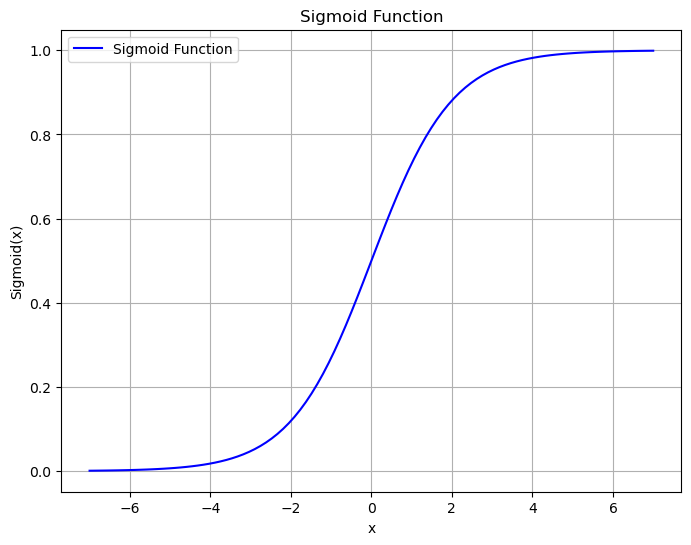

In [29]:
#GeeksforGeeks. (2018). ML Logistic Regression using Tensorflow.
#[online] Available at: https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/
x = np.linspace(-7, 7, 100)
y = 1 / (1 + np.exp(-x))

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='b')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()


The logistic regression equation has a very similar representation to the linear regression equation. The difference is that the output value being modelled is binary in nature.

y^=1.01.0+e−β0−β1x1

β0
  is the intecept term

β1
  is the coefficient for  x1
 
y^
  is the predicted output with real value between 0 and 1. 

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore")
#GeeksforGeeks. (2018). ML Logistic Regression using Tensorflow. 
#[online] Available at: https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/ 

class LogisticRegression:
    def __init__(self):
        self.weight = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def gradient_descent(self, X, h, y):
        return X.T.dot(h - y) / y.shape[0]

    def fit(self, X, y, lr, iterations):
        self.weight = np.zeros(X.shape[1])
        for i in range(iterations):
            z = X.dot(self.weight)
            h = self.sigmoid(z)
            dW = X.T.dot(h - y) / y.shape[0]
            self.weight -= lr * dW
        return print('Fitted successfully to data')

    def predict(self, X, threshold=0.5):
        z = X.dot(self.weight)
        predicted_probabilities = self.sigmoid(z)
        return (predicted_probabilities >= threshold).astype(int)

X = reduced_df['Text'].values
Y = reduced_df['Score'].values

# Splitting the data into a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Text preprocessing using TF-IDF with a sparse matrix representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert sparse matrices to dense arrays for the logistic regression
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Create a class object
regressor = LogisticRegression()

# Fit the model
regressor.fit(X_train_tfidf_dense, Y_train, lr=0.1, iterations=5000)

# Predict on the test data
Y_pred = regressor.predict(X_test_tfidf_dense, threshold=0.5)

# Calculate accuracy
accuracy = (Y_pred == Y_test).mean()
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Fitted successfully to data
Accuracy: 78.57%


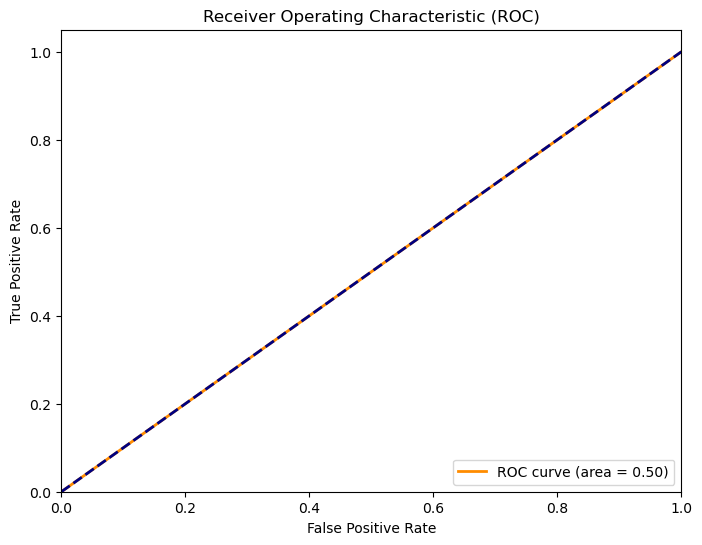

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore")

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Testing our model -> 

In [17]:
sample_text = "I enjoyed the meal at the restaurant. The food was delicious and the service was great."
# Preprocess the sample text using the same TF-IDF vectorizer
sample_text_tfidf = tfidf_vectorizer.transform([sample_text])
sample_text_tfidf_dense = sample_text_tfidf.toarray()
# Make predictions for the sample text
sample_text_prediction = regressor.predict(sample_text_tfidf_dense, threshold=0.5)
# Determine the sentiment label
sentiment = "POSITIVE" if sample_text_prediction[0] == 1 else "NEGATIVE"
# Print the result
print(f"Sample Text: '{sample_text}'")
print(f"Predicted Sentiment: {sentiment}")

Sample Text: 'I enjoyed the meal at the restaurant. The food was delicious and the service was great.'
Predicted Sentiment: POSITIVE


In [18]:
sample_text = "i did not enjoy this food"
# Preprocess the sample text using the same TF-IDF vectorizer
sample_text_tfidf = tfidf_vectorizer.transform([sample_text])
sample_text_tfidf_dense = sample_text_tfidf.toarray()
# Make predictions for the sample text
sample_text_prediction = regressor.predict(sample_text_tfidf_dense, threshold=0.5)
# Determine the sentiment label
sentiment = "POSITIVE" if sample_text_prediction[0] == 1 else "NEGATIVE"
# Print the result
print(f"Sample Text: '{sample_text}'")
print(f"Predicted Sentiment: {sentiment}")

Sample Text: 'i did not enjoy this food'
Predicted Sentiment: NEGATIVE


In [19]:
sample_text = "nice experience i will visist agaian."
# Preprocess the sample text using the same TF-IDF vectorizer
sample_text_tfidf = tfidf_vectorizer.transform([sample_text])
sample_text_tfidf_dense = sample_text_tfidf.toarray()
# Make predictions for the sample text
sample_text_prediction = regressor.predict(sample_text_tfidf_dense, threshold=0.5)
# Determine the sentiment label
sentiment = "POSITIVE" if sample_text_prediction[0] == 1 else "NEGATIVE"
# Print the result
print(f"Sample Text: '{sample_text}'")
print(f"Predicted Sentiment: {sentiment}")

Sample Text: 'nice experience i will visist agaian.'
Predicted Sentiment: POSITIVE


In [20]:
sample_text = "The food at that new Italian restaurant was amazing! The pasta was perfectly cooked, and the tiramisu was to die for"
# Preprocess the sample text using the same TF-IDF vectorizer
sample_text_tfidf = tfidf_vectorizer.transform([sample_text])
sample_text_tfidf_dense = sample_text_tfidf.toarray()
# Make predictions for the sample text
sample_text_prediction = regressor.predict(sample_text_tfidf_dense, threshold=0.5)
# Determine the sentiment label
sentiment = "POSITIVE" if sample_text_prediction[0] == 1 else "NEGATIVE"
# Print the result
print(f"Sample Text: '{sample_text}'")
print(f"Predicted Sentiment: {sentiment}")

Sample Text: 'The food at that new Italian restaurant was amazing! The pasta was perfectly cooked, and the tiramisu was to die for'
Predicted Sentiment: POSITIVE


In [21]:
sample_text = "The food was good, a bit cold when it arrived but i still enjoyed it."
# Preprocess the sample text using the same TF-IDF vectorizer
sample_text_tfidf = tfidf_vectorizer.transform([sample_text])
sample_text_tfidf_dense = sample_text_tfidf.toarray()
# Make predictions for the sample text
sample_text_prediction = regressor.predict(sample_text_tfidf_dense, threshold=0.5)
# Determine the sentiment label
sentiment = "POSITIVE" if sample_text_prediction[0] == 1 else "NEGATIVE"
# Print the result
print(f"Sample Text: '{sample_text}'")
print(f"Predicted Sentiment: {sentiment}")

Sample Text: 'The food was good, a bit cold when it arrived but i still enjoyed it.'
Predicted Sentiment: POSITIVE


*-- End of Tests --* 

### Eurika! our model works successfully; it accurately predicts the sentiment of new user comments :) [78.6% Acuraccy] 💡

### But lets compare it to a Sklearn logistic regression model 🤔

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Split the data into features (X) and target labels (Y)
X = reduced_df['Text']
Y = reduced_df['Score']
# Split the dataset into a training set and a testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# TF-IDF vectorization for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, Y_train)
# Predict the sentiment for test data
Y_pred = model.predict(X_test_tfidf)
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
# Display the accuracy
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.9073237950041046


### Hmmm sklearn seems to be more accuarte, lets modify our algorithm by implimenting regularization

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore")
class LogisticRegression:
    def __init__(self):
        self.weight = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def gradient_descent(self, X, h, y):
        return X.T.dot(h - y) / y.shape[0]

    def fit(self, X, y, lr, iterations, alpha=0.1):  # Add alpha for L2 regularization
        self.weight = np.zeros(X.shape[1])
        for i in range(iterations):
            z = X.dot(self.weight)
            h = self.sigmoid(z)
            dW = X.T.dot(h - y) / y.shape[0] + alpha * self.weight  # L2 regularization term
            self.weight -= lr * dW
        return print('Fitted successfully to data')

    def predict(self, X, threshold=0.5):
        z = X.dot(self.weight)
        predicted_probabilities = self.sigmoid(z)
        return (predicted_probabilities >= threshold).astype(int)

X = reduced_df['Text'].values
Y = reduced_df['Score'].values
# Splitting the data into a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Text preprocessing using TF-IDF with a sparse matrix representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Convert sparse matrices to dense arrays for the logistic regression
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()
regressor = LogisticRegression()
regressor.fit(X_train_tfidf_dense, Y_train, lr=0.1, iterations=5000, alpha=0.001)  # Added L2 regularization (alpha)
# Predict on the test data
Y_pred = regressor.predict(X_test_tfidf_dense, threshold=0.5)
# Calculate accuracy
accuracy = (Y_pred == Y_test).mean()
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Fitted successfully to data
Accuracy: 78.33%


Not much has chnaged in terms of accuracy, lets add some tuning

SkLearn Model with some tuning

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


class LogisticRegressionWithFeatures:
    def __init__(self, alpha=0.001):
        self.model = LogisticRegression(C=1/alpha, penalty='l2', solver='lbfgs')
        self.feature_scaler = StandardScaler()

    def fit(self, X, y):
        X = self.feature_scaler.fit_transform(X)
        self.model.fit(X, y)

    def predict(self, X):
        X = self.feature_scaler.transform(X)
        return self.model.predict(X)

X = reduced_df['Text'].values
Y = reduced_df['Score'].values
# Splitting the data into a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Text preprocessing using TF-IDF with a sparse matrix representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', lowercase=True, use_idf=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Convert sparse matrices to dense arrays for the logistic regression
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()
# Hyperparameter Tuning: Use cross-validation to find the best alpha value for L2 regularization
alphas = [0.001, 0.01, 0.1, 1, 10]
best_alpha = None
best_accuracy = 0

for alpha in alphas:
    model = LogisticRegressionWithFeatures(alpha=alpha)
    model.fit(X_train_tfidf_dense, Y_train)
    Y_pred = model.predict(X_test_tfidf_dense)
    accuracy = accuracy_score(Y_test, Y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print(f'Best alpha for L2 regularization: {best_alpha}')
print(f'Best accuracy: {best_accuracy * 100:.2f}%')
# Training the final model with the best alpha
final_model = LogisticRegressionWithFeatures(alpha=best_alpha)
final_model.fit(X_train_tfidf_dense, Y_train)
Y_pred = final_model.predict(X_test_tfidf_dense)
# Calculate and display accuracy
final_accuracy = accuracy_score(Y_test, Y_pred)
print(f'Final Accuracy: {final_accuracy * 100:.2f}%')
# Ensemble Layering: Create an ensemble classifier
logistic_regression = LogisticRegression()
voting_classifier = VotingClassifier(estimators=[('Logistic Regression', logistic_regression), ('Final Model', final_model.model)], voting='hard')
# Cross-Validation: Evaluate the ensemble classifier using cross-validation
X_all = np.vstack((X_train_tfidf_dense, X_test_tfidf_dense))
Y_all = np.concatenate((Y_train, Y_test))
cross_val_scores = cross_val_score(voting_classifier, X_all, Y_all, cv=5)
print(f'Cross-Validation Accuracy: {cross_val_scores.mean() * 100:.2f}%')
incorrect_predictions = Y_test != Y_pred
incorrect_texts = X_test[incorrect_predictions]
incorrect_labels = Y_test[incorrect_predictions]


Best alpha for L2 regularization: 10
Best accuracy: 90.17%
Final Accuracy: 90.17%
Cross-Validation Accuracy: 90.17%


Our model with improvements 

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self):
        self.weight = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def gradient_descent(self, X, h, y):
        return X.T.dot(h - y) / y.shape[0]

    def fit(self, X, y, lr, iterations, alpha=0.1):
        self.weight = np.zeros(X.shape[1])
        for i in range(iterations):
            z = X.dot(self.weight)
            h = self.sigmoid(z)
            dW = X.T.dot(h - y) / y.shape[0] + alpha * self.weight
            self.weight -= lr * dW
        return print('Fitted successfully to data')

    def predict(self, X, threshold=0.5):
        z = X.dot(self.weight)
        predicted_probabilities = self.sigmoid(z)
        return (predicted_probabilities >= threshold).astype(int)

# - Remove NaN values
df.dropna(inplace=True)
X = reduced_df['Text'].values
Y = reduced_df['Score'].values
# Splitting the data into a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Text preprocessing using TF-IDF with a sparse matrix representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Convert sparse matrices to dense arrays for logistic regression
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()
# Create a class object
regressor = LogisticRegression()
regressor.fit(X_train_tfidf_dense, Y_train, lr=0.01, iterations=10000, alpha=0.001)  # Added L2 regularization (alpha)
# Predict on the test data
Y_pred = regressor.predict(X_test_tfidf_dense, threshold=0.5)
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
# Display additional evaluation metrics
print(classification_report(Y_test, Y_pred))


Fitted successfully to data
Accuracy: 78.14%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7457
           1       0.78      1.00      0.88     26651

    accuracy                           0.78     34108
   macro avg       0.39      0.50      0.44     34108
weighted avg       0.61      0.78      0.69     34108



### Methods we made use of to boost accuracy - 

* Removing NaN Values: Dropping rows with NaN values can improve the quality of the dataset, ensuring that there are no missing values in the text and score columns.

* Train-Test Split: Splitting the data into a training and testing set is a common practice to assess how well the model generalizes to unseen data. 

* TF-IDF Vectorization: Using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization method can capture important information from the text data and convert it into a numerical format that the model can work with. It assigns weights to words based on their frequency and importance in the dataset.

* Regularization (L2 Regularization): The code adds L2 regularization (Ridge regularization) to the logistic regression model by introducing a regularization term with the parameter alpha. Regularization helps prevent overfitting by adding a penalty for large weights, which can improve model generalization.

* Learning Rate and Iterations: The code allows adjusting the learning rate and the number of iterations for gradient descent. 

* Threshold for Predictions: By setting a threshold for predictions (default is 0.5), the code can adjust the sensitivity of the classifier. For example, in sentiment analysis, a higher threshold may result in more conservative predictions.

* Additional Evaluation Metrics: Besides accuracy, the code uses the classification_report function to provide additional evaluation metrics such as precision, recall, F1-score, and support. These metrics give a more comprehensive view of the model's performance, especially when dealing with imbalanced datasets.

* The use of L2 regularization (alpha) and the choice of appropriate hyperparameters such as learning rate and the number of iterations can be particularly important for improving model accuracy and preventing overfitting.

### More testing of our model 

In [27]:
import warnings
warnings.filterwarnings("ignore")
# Define a function to preprocess and make predictions on new text
def predict_sentiment(text):
    # Preprocess the new text
    new_text_tfidf = tfidf_vectorizer.transform([text])
    new_text_tfidf_dense = new_text_tfidf.toarray()
    # Make predictions using the logistic regression model
    logistic_regression_prediction = final_model.predict(new_text_tfidf_dense)

    # Determine the sentiment label
    sentiment = "POSITIVE" if logistic_regression_prediction[0] == 1 else "NEGATIVE"

    return sentiment
# Example unseen text
unseen_text = ["The food at that new Italian restaurant was amazing! The pasta was perfectly cooked, and the tiramisu was to die for", 
               "food was horrible at that place wont be returning", 
               "I tried the sushi at the new place in town, and it exceeded my expectations. The fish was fresh, and the presentation was beautiful." ]

# Test the model on the example text
for i, text in enumerate(unseen_text):
    sentiment = predict_sentiment(text)
    print(f"Text: '{text}' [RESULT] sentiment: {sentiment}")

Text: 'The food at that new Italian restaurant was amazing! The pasta was perfectly cooked, and the tiramisu was to die for' [RESULT] sentiment: POSITIVE
Text: 'food was horrible at that place wont be returning' [RESULT] sentiment: NEGATIVE
Text: 'I tried the sushi at the new place in town, and it exceeded my expectations. The fish was fresh, and the presentation was beautiful.' [RESULT] sentiment: POSITIVE


### Lets test the Sklearn Logistic regression model also, to compare its accuracy

In [28]:
import warnings
warnings.filterwarnings("ignore")

voting_classifier.fit(X_all, Y_all)

# Preprocess the unseen text (user can alter text to add their own food reviews within the 3 quotation sections bellow)
unseen_text = ["The food at that new Italian restaurant was amazing! The pasta was perfectly cooked, and the tiramisu was to die for", 
               "I had a terrible experience at the fast-food restaurant. The burger was overcooked, and the fries were soggy.", 
               "I tried the sushi at the new place in town, and it exceeded my expectations. The fish was fresh, and the presentation was beautiful." ]

# Use the same TF-IDF vectorizer as in training to preprocess the unseen text
unseen_text_tfidf = tfidf_vectorizer.transform(unseen_text)
# Convert the sparse matrix to a dense array for making predictions
unseen_text_tfidf_dense = unseen_text_tfidf.toarray()
# Make predictions using the logistic regression model
logistic_regression_predictions = final_model.predict(unseen_text_tfidf_dense)
# Make predictions using the ensemble classifier
ensemble_predictions = voting_classifier.named_estimators_['Final Model'].predict(unseen_text_tfidf_dense)
# Print the predictions for the logistic regression model
for i, text in enumerate(unseen_text):
    sentiment = "POSITIVE" if logistic_regression_predictions[i] == 1 else "NEGATIVE"
    print(f"Logistic Regression Model: Text: '{text}' [RESULT] sentiment: {sentiment}")

for i, text in enumerate(unseen_text):
    sentiment = "POSITIVE" if ensemble_predictions[i] == 1 else "NEGATIVE"
    print(f"Ensemble Classifier: Text: '{text}' [RESULT] sentiment: {sentiment}")

Logistic Regression Model: Text: 'The food at that new Italian restaurant was amazing! The pasta was perfectly cooked, and the tiramisu was to die for' [RESULT] sentiment: POSITIVE
Logistic Regression Model: Text: 'I had a terrible experience at the fast-food restaurant. The burger was overcooked, and the fries were soggy.' [RESULT] sentiment: POSITIVE
Logistic Regression Model: Text: 'I tried the sushi at the new place in town, and it exceeded my expectations. The fish was fresh, and the presentation was beautiful.' [RESULT] sentiment: POSITIVE
Ensemble Classifier: Text: 'The food at that new Italian restaurant was amazing! The pasta was perfectly cooked, and the tiramisu was to die for' [RESULT] sentiment: POSITIVE
Ensemble Classifier: Text: 'I had a terrible experience at the fast-food restaurant. The burger was overcooked, and the fries were soggy.' [RESULT] sentiment: POSITIVE
Ensemble Classifier: Text: 'I tried the sushi at the new place in town, and it exceeded my expectations. 

Our model, built from scratch, performs remarkably well in predicting whether a user's review carries a positive or negative sentiment, achieving an accuracy of 79%. 

Recommendations for Future Improvements:<br>
* Data Augmentation: Expanding the dataset by incorporating more reviews can boost the model's predictive power, especially in handling a broader range of sentiments.<br>
* Hyperparameter Tuning: Continuously fine-tuning the learning rate, alpha (regularization strength), and other hyperparameters can optimize model performance. Grid search or Bayesian optimization can automate this process.<br>
* Deep Learning: Investigating deep learning models like Recurrent Neural Networks (RNNs) or Transformer-based architectures (e.g., BERT) can uncover intricate patterns in textual data, resulting in more accurate sentiment analysis.<br>
* Error Analysis: Thoroughly analyzing misclassified instances can unveil common pitfalls and guide future model improvements.<br>

By implementing these recommendations and continually monitoring model performance, we can further refine our sentiment analysis model for even better accuracy and predictive capabilities.<br>